In [497]:
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


In [498]:
# 데이터 시각화에 사용할 라이브러리
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# Global Variavbles

In [499]:
import easydict
import json
args = easydict.EasyDict()

# path 정보
args.default_path = '/content/data/MyDrive/data engineering/project/'
args.train_csv = args.default_path+'train.csv'
args.test_csv = args.default_path+'test.csv'
args.submission_csv = args.default_path+'submission.csv'
args.submission_file = args.default_path+'submission_0228.csv'

# 데이터 분석을 위한 변수들
args.random_state = 21
args.results = []

In [500]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 데이터 로드

In [1118]:
train = pd.read_csv(args.train_csv)
print(f'{train.shape}')
train.head()

(916, 12)


,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [1119]:
test = pd.read_csv(args.test_csv)
print(f'{test.shape}')
test.head()

(393, 11)


,passengerid,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
1,917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
2,918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
3,919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
4,920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [1120]:
submission = pd.read_csv(args.submission_csv)
print(f'{submission.shape}')
submission.head()

(393, 2)


,passengerid,survived
0,916,0.5
1,917,0.5
2,918,0.5
3,919,0.5
4,920,0.5


In [1121]:
ori_train = pd.read_csv(args.train_csv)
ori_test = pd.read_csv(args.test_csv)

ori_train.shape, ori_test.shape

((916, 12), (393, 11))

In [1122]:
ori_train.drop('passengerid', axis=1, inplace=True)
ori_train.head()

,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,2,"Wheeler, Mr. Edwin Frederick""""",male,NaN,0,0,SC/PARIS 2159,12.8750,NaN,S
1,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q
2,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5000,B69,S
3,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
4,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


In [1123]:
ori_test.set_index(['passengerid'], inplace=True) 
print(f'{ori_test.shape}')
ori_test.head()

(393, 10)


,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
passengerid,,,,,,,,,,
916,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
917,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S
918,3,"McCarthy, Miss. Catherine Katie""""",female,NaN,0,0,383123,7.7500,NaN,Q
919,3,"Franklin, Mr. Charles (Charles Fardon)",male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S
920,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [1124]:
ori_train.shape, ori_test.shape

((916, 11), (393, 10))

# EDA

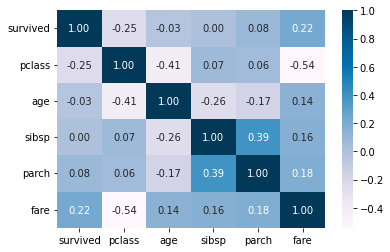

In [1125]:
g = sns.heatmap(train.iloc[:, 1:].corr(),
                annot=True, 
                fmt = ".2f", 
                cmap = "PuBu")

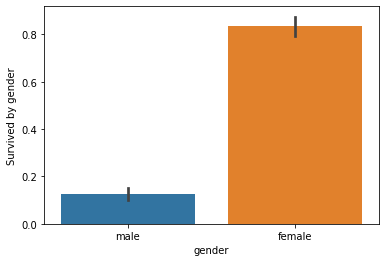

In [1126]:
g = sns.barplot(x="gender",y="survived",data=train)
g = g.set_ylabel("Survived by gender")

- 남성이 많이 사망했다.

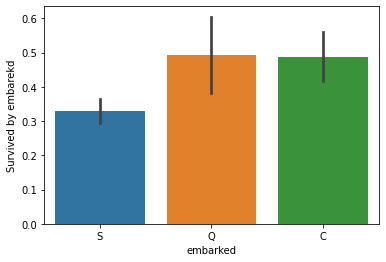

In [1127]:
g = sns.barplot(x="embarked",y="survived",data=train)
g = g.set_ylabel("Survived by embarekd")

- Q에서 탑승한 사람들이 생존률이 높다. 

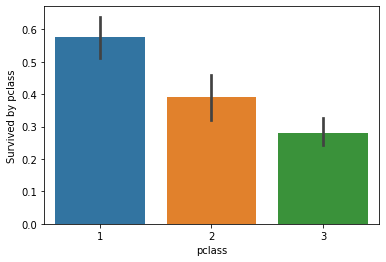

In [1128]:
g = sns.barplot(x="pclass",y="survived",data=train)
g = g.set_ylabel("Survived by pclass")

- pclass 순서대로 생존률이 높다.

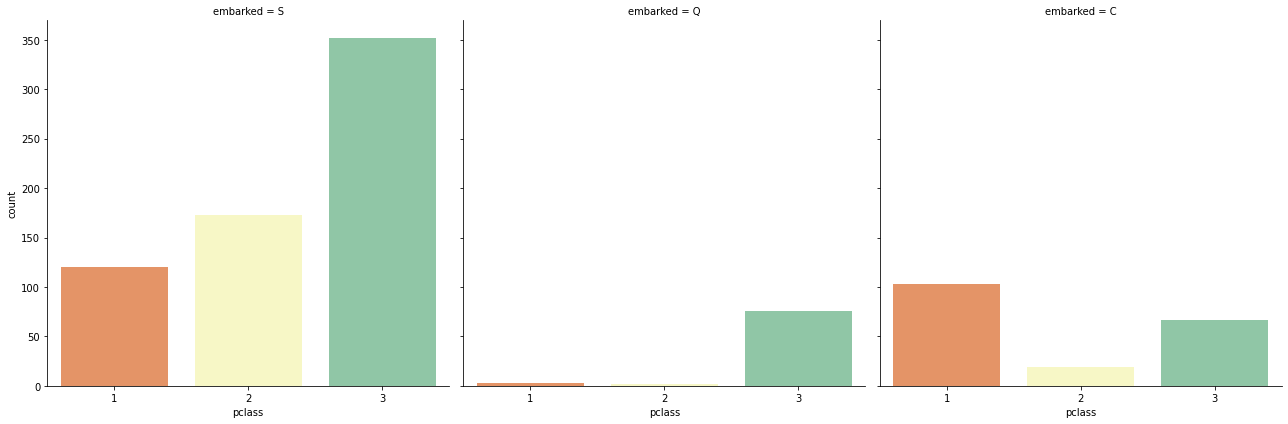

In [1129]:
g = sns.catplot(x="pclass", data=train, height=6, kind="count", palette="Spectral", col='embarked')
g = g.set_ylabels("count")

- pclass 3의 승선 비율이 높은 S 항구는 사망률이 높을 것이다.

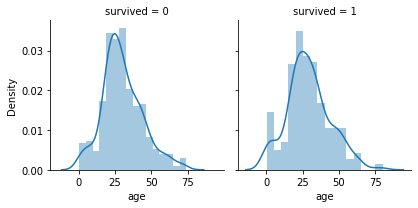

In [1130]:
g = sns.FacetGrid(train, col='survived')
g = g.map(sns.distplot, "age")

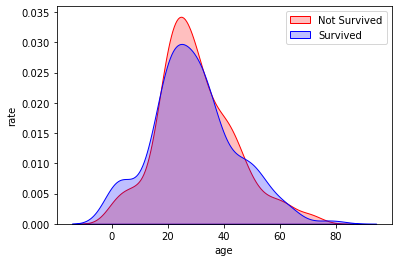

In [1131]:
g = sns.kdeplot(train["age"][(train["survived"] == 0) & (train["age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train["age"][(train["survived"] == 1) & (train["age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("age")
g.set_ylabel("rate")
g = g.legend(["Not Survived","Survived"])

- 어린 아이들은 생존률이 높다.
- 20-40세 사이는 생존률이 낮아 보인다.

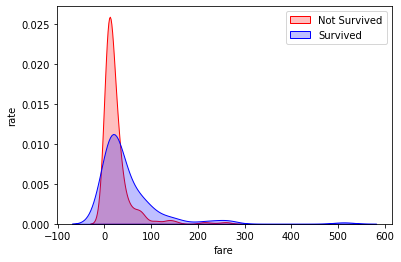

In [1132]:
g = sns.kdeplot(train["fare"][(train["survived"] == 0) & (train["age"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train["fare"][(train["survived"] == 1) & (train["age"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("fare")
g.set_ylabel("rate")
g = g.legend(["Not Survived","Survived"])

- 지불한 비용이 낮을수록 생존률이 낮다.

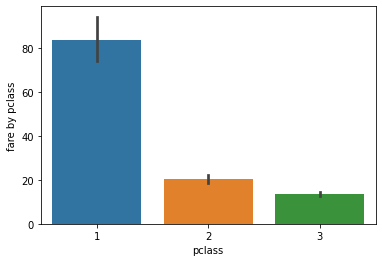

In [1133]:
g = sns.barplot(x="pclass",y="fare",data=train)
g = g.set_ylabel("fare by pclass")

- 지불 비용은 pclass 순서대로 높다.

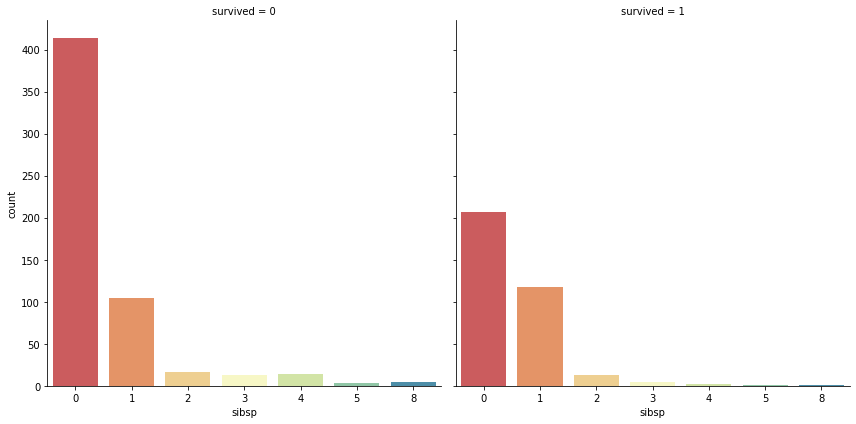

In [1134]:
g = sns.catplot(x="sibsp", data=train, height=6, kind="count", palette="Spectral", col='survived')
g = g.set_ylabels("count")

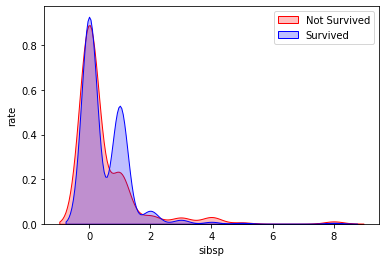

In [1135]:
g = sns.kdeplot(train["sibsp"][(train["survived"] == 0) & (train["sibsp"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train["sibsp"][(train["survived"] == 1) & (train["sibsp"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("sibsp")
g.set_ylabel("rate")
g = g.legend(["Not Survived","Survived"])

- 동승한 자매, 배우자 수가 없을 때보다 소수 있을 때 생존률이 높다.

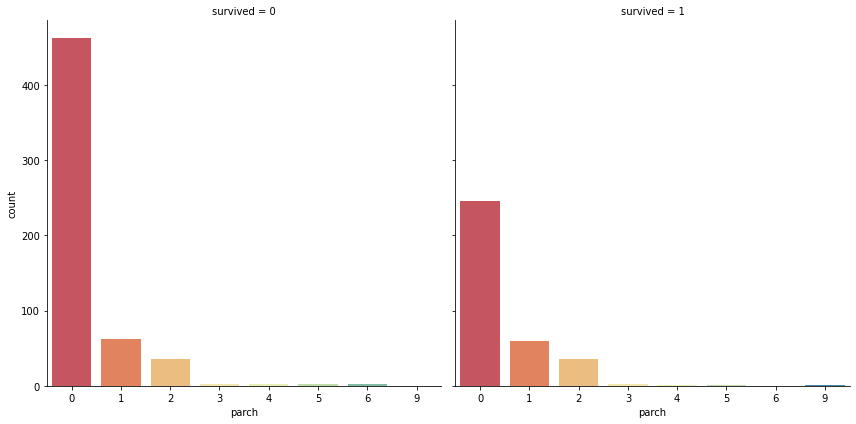

In [1136]:
g = sns.catplot(x="parch", data=train, height=6, kind="count", palette="Spectral", col='survived')
g = g.set_ylabels("count")

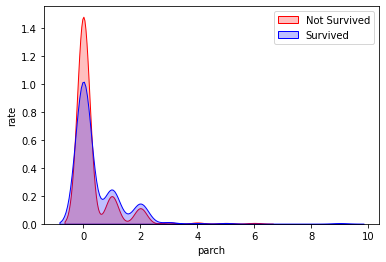

In [1137]:
g = sns.kdeplot(train["parch"][(train["survived"] == 0) & (train["parch"].notnull())], color="Red", shade = True)
g = sns.kdeplot(train["parch"][(train["survived"] == 1) & (train["parch"].notnull())], ax=g, color="Blue", shade= True)
g.set_xlabel("parch")
g.set_ylabel("rate")
g = g.legend(["Not Survived","Survived"])

- 동승한 부모, 자녀가 없으면 사망률이 매우 높다.

# 데이터 분리

In [1138]:
from sklearn.model_selection import train_test_split

In [1139]:
y = ori_train['survived']
X = ori_train.drop(['survived'], axis=1)

In [1140]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, stratify=y, test_size=0.3, random_state = args.random_state)

X_tr.shape, X_te.shape, y_tr.shape, y_te.shape

((641, 10), (275, 10), (641,), (275,))

# Model Version 1

In [1141]:
train = X_tr.copy() 
test = X_te.copy()
ori_te = ori_test.copy()

train.shape, test.shape, ori_te.shape

((641, 10), (275, 10), (393, 10))

## Data Preprocessing

In [1142]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 812 to 277
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    641 non-null    int64  
 1   name      641 non-null    object 
 2   gender    641 non-null    object 
 3   age       512 non-null    float64
 4   sibsp     641 non-null    int64  
 5   parch     641 non-null    int64  
 6   ticket    641 non-null    object 
 7   fare      641 non-null    float64
 8   cabin     135 non-null    object 
 9   embarked  641 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 55.1+ KB


In [1143]:
train.describe()

,pclass,age,sibsp,parch,fare
count,641.000000,512.000000,641.000000,641.000000,641.000000
mean,2.305772,30.344082,0.466459,0.368175,31.654446
std,0.829221,14.492658,0.961386,0.897140,49.827609
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.400000
75%,3.000000,38.000000,1.000000,0.000000,30.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [1144]:
train.describe(include='O')

,name,gender,ticket,cabin,embarked
count,641,641,641,135,641
unique,641,2,529,110,3
top,"Ohman, Miss. Velin",male,3101295,B96 B98,S
freq,1,407,5,3,455


### Drop Values
- 지나치게 세분화된 데이터들을 drop한다.

In [1145]:
train['cabin'].nunique()

110

In [1146]:
train['ticket'].nunique()

529

In [1147]:
train.drop(['cabin', 'ticket'], axis=1, inplace=True)
test.drop(['cabin', 'ticket'], axis=1, inplace=True)
ori_te.drop(['cabin', 'ticket'], axis=1, inplace=True)

print(train.shape, test.shape)

(641, 8) (275, 8)


### Missing Values

In [1148]:
train.isnull().sum()

pclass        0
name          0
gender        0
age         129
sibsp         0
parch         0
fare          0
embarked      0
dtype: int64

In [1149]:
test.isnull().sum()

pclass       0
name         0
gender       0
age         51
sibsp        0
parch        0
fare         0
embarked     1
dtype: int64

In [1150]:
ori_te.isnull().sum()

pclass       0
name         0
gender       0
age         83
sibsp        0
parch        0
fare         1
embarked     1
dtype: int64

#### age
- 원래 데이터의 분포를 최대한 보존하기 위해 train에서 random sampling 한다.
- pclass와 관련지어 샘플링해도 좋을 것 같다.

In [1151]:
df_p1 = train[train['pclass']==1]
df_p2 = train[train['pclass']==2]
df_p3 = train[train['pclass']==3]

dfs = [df_p1, df_p2, df_p3]

In [1154]:
for data in dfs :
  random_sampling= (data['age'].dropna().sample(train['age'].isnull().sum(), random_state=args.random_state))
  random_sampling.index = train[lambda x : x['age'].isnull()].index
  train.loc[train['age'].isnull(), 'age'] = random_sampling

  random_sampling = (data['age'].dropna().sample(test['age'].isnull().sum(), random_state=args.random_state))
  random_sampling.index = test[lambda x : x['age'].isnull()].index
  test.loc[test['age'].isnull(), 'age'] = random_sampling

  random_sampling = (data['age'].dropna().sample(ori_te['age'].isnull().sum(), random_state=args.random_state))
  random_sampling.index = ori_te[lambda x : x['age'].isnull()].index
  ori_te.loc[ori_te['age'].isnull(), 'age'] = random_sampling

In [1155]:
train.isnull().sum()

pclass      0
name        0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [1156]:
test.isnull().sum()

pclass      0
name        0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    1
dtype: int64

In [1157]:
ori_te.isnull().sum()

pclass      0
name        0
gender      0
age         0
sibsp       0
parch       0
fare        1
embarked    1
dtype: int64

#### embarked
- 최빈값으로 replace한다.

In [1158]:
embarked_mode = train['embarked'].mode().values[0]
embarked_mode

'S'

In [1159]:
test['embarked'].fillna(embarked_mode, inplace=True)
ori_te['embarked'].fillna(embarked_mode, inplace=True)

test.isnull().sum()

pclass      0
name        0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [1160]:
ori_te.isnull().sum()

pclass      0
name        0
gender      0
age         0
sibsp       0
parch       0
fare        1
embarked    0
dtype: int64

#### fare
- median 값으로 채워준다.

In [1161]:
median_fare = train['fare'].median()
median_fare

14.4

In [1162]:
ori_te['fare'].fillna(median_fare, inplace=True)

In [1163]:
ori_te.isnull().sum()

pclass      0
name        0
gender      0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

## Feature Extraction

In [1164]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 812 to 277
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    641 non-null    int64  
 1   name      641 non-null    object 
 2   gender    641 non-null    object 
 3   age       641 non-null    float64
 4   sibsp     641 non-null    int64  
 5   parch     641 non-null    int64  
 6   fare      641 non-null    float64
 7   embarked  641 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 45.1+ KB


### 성별을 범주형으로 변환
- 종류가 2개뿐이라서, map 이용 
- 범주형 변환하지 않고 인코딩 하는 방법도 고려해보아야 함

In [1165]:
# train['gender'] = train['gender'].map({'female' : 1, 'male' : 0 }).astype(int)
# test['gender'] = test['gender'].map({'female' : 1, 'male' : 0 }).astype(int)
# ori_te['gender'] = ori_te['gender'].map({'female' : 1, 'male' : 0 }).astype(int)
# train.head()

In [1166]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 812 to 277
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    641 non-null    int64  
 1   name      641 non-null    object 
 2   gender    641 non-null    object 
 3   age       641 non-null    float64
 4   sibsp     641 non-null    int64  
 5   parch     641 non-null    int64  
 6   fare      641 non-null    float64
 7   embarked  641 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 45.1+ KB


### add designation
- designation을 추가하고 획일화 해준다. 

In [1167]:
dict_designation = {
    #성별 
    'Mr': '남성',
    'Master': '어린 남성',
    'Sir': '남성',
    'Miss': '미혼 여성',
    'Mrs': '기혼 여성',
    'Ms': '미혼/기혼 여성',
    'Lady': '숙녀',
    'Mlle': '아가씨',
    # 직업
    'Dr': '의사',
    'Rev': '목사',
    'Major': '계급',
    'Don': '교수',
    'Col': '군인',
    'Capt': '군인',
    # 귀족
    'Mme': '영부인',
    'Countess': '백작부인',
    'Jonkheer': '귀족'
}


def add_designation(name) :
    designation = 'unknown'
    for key in dict_designation.keys() :
        if key in name :
            designation = key
            break
    return designation

train['designation'] = train['name'].map(lambda x : add_designation(x))
test['designation'] = test['name'].map(lambda x : add_designation(x))
ori_te['designation'] = ori_te['name'].map(lambda x : add_designation(x))

train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,designation
812,3,"Ohman, Miss. Velin",female,22.0,0,0,7.7750,S,Miss
134,3,"Buckley, Mr. Daniel",male,21.0,0,0,7.8208,Q,Mr
390,3,"Jonsson, Mr. Carl",male,32.0,0,0,7.8542,S,Mr
305,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,18.7875,C,Mr
203,3,"Corn, Mr. Harry",male,30.0,0,0,8.0500,S,Mr


In [1168]:
# 반복문 사용할 수 있을듯... 나중에 해보기 
train['designation'] = train['designation'].replace(['Lady','Countess','Capt','Col','Don','Dr','Jonkheer','Major','Rev', 'Sir'], 'Rare')
train['designation'] = train['designation'].replace('Mlle','Miss')
train['designation'] = train['designation'].replace('Ms','Miss')

test['designation'] = test['designation'].replace(['Lady','Countess','Capt','Col','Don','Dr','Jonkheer','Major','Rev', 'Sir'], 'Rare')
test['designation'] = test['designation'].replace('Mlle','Miss')
test['designation'] = test['designation'].replace('Ms','Miss')

ori_te['designation'] = ori_te['designation'].replace(['Lady','Countess','Capt','Col','Don','Dr','Jonkheer','Major','Rev', 'Sir'], 'Rare')
ori_te['designation'] = ori_te['designation'].replace('Mlle','Miss')
ori_te['designation'] = ori_te['designation'].replace('Ms','Miss')

train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,designation
812,3,"Ohman, Miss. Velin",female,22.0,0,0,7.7750,S,Miss
134,3,"Buckley, Mr. Daniel",male,21.0,0,0,7.8208,Q,Mr
390,3,"Jonsson, Mr. Carl",male,32.0,0,0,7.8542,S,Mr
305,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,18.7875,C,Mr
203,3,"Corn, Mr. Harry",male,30.0,0,0,8.0500,S,Mr


### add job
- 직업이 생존률과 관련이 있을 수 있으므로, 추가해준다. 

In [1169]:
dict_job = {
    'Mr': 'Others',
    'Master': 'Others',
    'Miss': 'Others',
    'Mrs': 'Others',
    'Ms': 'Others',
    'Mlle': 'Others',
    # 직업
    'Dr': 'Officer',
    'Rev': 'Officer',
    'Major': 'Officer',
    'Col': 'Officer',
    'Capt': 'Officer',
    # 귀족
    'Don': 'Royalty',
    'Sir': 'Royalty',
    'Lady': 'Royalty',
    'Mme': 'Royalty',
    'Countess': 'Royalty',
    'Jonkheer': 'Royalty'
}

def add_job(name) :
    job = 'others'
    for key in dict_job.keys() :
        if key in name :
            job = dict_job[key]
            break
    return job

train['job'] = train['name'].map(lambda x : add_job(x))
test['job'] = test['name'].map(lambda x : add_job(x))
ori_te['job'] = ori_te['name'].map(lambda x : add_job(x))

train.head()

,pclass,name,gender,age,sibsp,parch,fare,embarked,designation,job
812,3,"Ohman, Miss. Velin",female,22.0,0,0,7.7750,S,Miss,Others
134,3,"Buckley, Mr. Daniel",male,21.0,0,0,7.8208,Q,Mr,Others
390,3,"Jonsson, Mr. Carl",male,32.0,0,0,7.8542,S,Mr,Others
305,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,18.7875,C,Mr,Others
203,3,"Corn, Mr. Harry",male,30.0,0,0,8.0500,S,Mr,Others


In [1170]:
train.drop('name', axis=1, inplace=True)
test.drop('name', axis=1, inplace=True)
ori_te.drop('name', axis=1, inplace=True)

### add sub_age
- 그래프에서 특정 연령대의 생존률이 높은 것을 확인했으므로, sub_age를 생성해준다.
- age_group을 만들어 보는 것도 좋은 방법 같아 보인다. 나중에 해보기

In [1171]:
train['sub_age'] = train['age'] // 10
test['sub_age'] = test['age'] // 10
ori_te['sub_age'] = ori_te['age'] // 10

train.head()

,pclass,gender,age,sibsp,parch,fare,embarked,designation,job,sub_age
812,3,female,22.0,0,0,7.7750,S,Miss,Others,2.0
134,3,male,21.0,0,0,7.8208,Q,Mr,Others,2.0
390,3,male,32.0,0,0,7.8542,S,Mr,Others,3.0
305,3,male,11.0,0,0,18.7875,C,Mr,Others,1.0
203,3,male,30.0,0,0,8.0500,S,Mr,Others,3.0


### add gender+pclass
- 생존에 가장 큰 영향을 미치는 두 조건 결합 - 인코딩 할 것임
- gender와 여러가지 조합해볼 것

In [1172]:
train['gender+pclass'] = train.apply(lambda row: row['gender']+str(row['pclass']), axis=1)
test['gender+pclass'] = test.apply(lambda row: row['gender']+str(row['pclass']), axis=1)
ori_te['gender+pclass'] = ori_te.apply(lambda row: row['gender']+str(row['pclass']), axis=1)

train.head()

,pclass,gender,age,sibsp,parch,fare,embarked,designation,job,sub_age,gender+pclass
812,3,female,22.0,0,0,7.7750,S,Miss,Others,2.0,female3
134,3,male,21.0,0,0,7.8208,Q,Mr,Others,2.0,male3
390,3,male,32.0,0,0,7.8542,S,Mr,Others,3.0,male3
305,3,male,11.0,0,0,18.7875,C,Mr,Others,1.0,male3
203,3,male,30.0,0,0,8.0500,S,Mr,Others,3.0,male3


### Scaling
- fare과 age를 StandardScaler로 스케일링 해준다.
- 다른 Sclaer를 이용하면 어떻게 변화할지 더 알아보면 좋을 것 같다.

In [1173]:
train['fare'].skew(), train['fare'].kurt()

(4.729119155987176, 31.95993231511127)

In [1174]:
train['age'].skew(), train['age'].kurt()

(0.5217242484976028, 0.18935249313388747)

In [1175]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [1176]:
scale = StandardScaler().fit(train[['fare']])

train['fare'] = scale.transform(train[['fare']])
test['fare'] = scale.transform(test[['fare']])
ori_te['fare'] = scale.transform(ori_te[['fare']])

In [1177]:
scale = MinMaxScaler().fit(train[['age']])

train['age'] = scale.transform(train[['age']])
test['age'] = scale.transform(test[['age']])
ori_te['age'] = scale.transform(ori_te[['age']])

In [1178]:
train.isnull().sum()

pclass           0
gender           0
age              0
sibsp            0
parch            0
fare             0
embarked         0
designation      0
job              0
sub_age          0
gender+pclass    0
dtype: int64

### add accompany
- sibsp, parch를 모두 고려한 동행자 수 feature를 만들어 보았다.

In [1179]:
train['accompany'] = train['sibsp'] + train['parch']
test['accompany'] = test['sibsp'] + test['parch']
ori_te['accompany'] = ori_te['sibsp'] + ori_te['parch']
train.head()

,pclass,gender,age,sibsp,parch,fare,embarked,designation,job,sub_age,gender+pclass,accompany
812,3,female,0.273456,0,0,-0.479616,S,Miss,Others,2.0,female3,0
134,3,male,0.260929,0,0,-0.478696,Q,Mr,Others,2.0,male3,0
390,3,male,0.398722,0,0,-0.478025,S,Mr,Others,3.0,male3,0
305,3,male,0.135663,0,0,-0.258431,C,Mr,Others,1.0,male3,0
203,3,male,0.373669,0,0,-0.474092,S,Mr,Others,3.0,male3,0


### add alone
- 시각화에서 일행이 없는 경우 사망률이 높은 경향도 있었기 때문에, 동승자 여부와 관련된 feature도 추출해보았다.

In [1180]:
train['alone'] = 0
test['alone'] = 0
ori_te['alone'] = 0

train.loc[train['accompany'] == 0, 'alone'] = 1
test.loc[test['accompany'] == 0, 'alone'] = 1
ori_te.loc[ori_te['accompany'] == 0, 'alone'] = 1

train.head()

,pclass,gender,age,sibsp,parch,fare,embarked,designation,job,sub_age,gender+pclass,accompany,alone
812,3,female,0.273456,0,0,-0.479616,S,Miss,Others,2.0,female3,0,1
134,3,male,0.260929,0,0,-0.478696,Q,Mr,Others,2.0,male3,0,1
390,3,male,0.398722,0,0,-0.478025,S,Mr,Others,3.0,male3,0,1
305,3,male,0.135663,0,0,-0.258431,C,Mr,Others,1.0,male3,0,1
203,3,male,0.373669,0,0,-0.474092,S,Mr,Others,3.0,male3,0,1


## One hot Encoding
- object 뿐만 아니라 수치형 데이터 중 데이터에 연속성이 없다는 것을 알려주고 싶은 feature를 골라 인코딩

In [1181]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 641 entries, 812 to 277
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   pclass         641 non-null    int64  
 1   gender         641 non-null    object 
 2   age            641 non-null    float64
 3   sibsp          641 non-null    int64  
 4   parch          641 non-null    int64  
 5   fare           641 non-null    float64
 6   embarked       641 non-null    object 
 7   designation    641 non-null    object 
 8   job            641 non-null    object 
 9   sub_age        641 non-null    float64
 10  gender+pclass  641 non-null    object 
 11  accompany      641 non-null    int64  
 12  alone          641 non-null    int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 70.1+ KB


In [1182]:
ori_te.isnull().sum()

pclass           0
gender           0
age              0
sibsp            0
parch            0
fare             0
embarked         0
designation      0
job              0
sub_age          0
gender+pclass    0
accompany        0
alone            0
dtype: int64

In [1183]:
from sklearn.preprocessing import OneHotEncoder

In [1184]:
cols = ['pclass', 'embarked', 'designation', 'job', 'accompany', 'sub_age', 'gender+pclass', 'gender', 'sibsp']

In [1185]:
# 다른 방식으로도 구현할 수 있을 것 같다...

print(f'before: {train.shape} / {test.shape}')

enc = OneHotEncoder(handle_unknown = 'ignore')

# train
tmp_tr = pd.DataFrame(
    enc.fit_transform(train[cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_tr = pd.concat(
    [train.reset_index(drop=True), tmp_tr.reset_index(drop=True)]
    , axis=1
)
# test
tmp_te = pd.DataFrame(
    enc.transform(test[cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_te = pd.concat(
    [test.reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)
# ori_test
tmp_te = pd.DataFrame(
    enc.transform(ori_te[cols]).toarray(), 
    columns = enc.get_feature_names_out()
)
enc_ori_te = pd.concat(
    [ori_te.reset_index(drop=True), tmp_te.reset_index(drop=True)]
    , axis=1
)

print(f'after: {enc_tr.shape} / {enc_te.shape}')
enc_tr.head()

before: (641, 13) / (275, 13)
after: (641, 59) / (275, 59)


,pclass,gender,age,sibsp,parch,fare,embarked,designation,job,sub_age,...,gender+pclass_male3,gender_female,gender_male,sibsp_0,sibsp_1,sibsp_2,sibsp_3,sibsp_4,sibsp_5,sibsp_8
0,3,female,0.273456,0,0,-0.479616,S,Miss,Others,2.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,male,0.260929,0,0,-0.478696,Q,Mr,Others,2.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,male,0.398722,0,0,-0.478025,S,Mr,Others,3.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,male,0.135663,0,0,-0.258431,C,Mr,Others,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,male,0.373669,0,0,-0.474092,S,Mr,Others,3.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1186]:
enc_tr.drop(cols, axis=1, inplace=True)
enc_te.drop(cols, axis=1, inplace=True)
enc_ori_te.drop(cols, axis=1, inplace=True)

enc_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    641 non-null    float64
 1   parch                  641 non-null    int64  
 2   fare                   641 non-null    float64
 3   alone                  641 non-null    int64  
 4   pclass_1               641 non-null    float64
 5   pclass_2               641 non-null    float64
 6   pclass_3               641 non-null    float64
 7   embarked_C             641 non-null    float64
 8   embarked_Q             641 non-null    float64
 9   embarked_S             641 non-null    float64
 10  designation_Master     641 non-null    float64
 11  designation_Miss       641 non-null    float64
 12  designation_Mr         641 non-null    float64
 13  designation_Rare       641 non-null    float64
 14  job_Officer            641 non-null    float64
 15  job_Ot

## Training

In [1187]:
enc_tr.isnull().sum().sum(), enc_te.isnull().sum().sum(), enc_ori_te.isnull().sum().sum()

(0, 0, 0)

In [1188]:
enc_tr.shape, enc_te.shape, enc_ori_te.shape

((641, 50), (275, 50), (393, 50))

In [1189]:
enc_tr.columns

Index(['age', 'parch', 'fare', 'alone', 'pclass_1', 'pclass_2', 'pclass_3',
       'embarked_C', 'embarked_Q', 'embarked_S', 'designation_Master',
       'designation_Miss', 'designation_Mr', 'designation_Rare', 'job_Officer',
       'job_Others', 'job_Royalty', 'accompany_0', 'accompany_1',
       'accompany_2', 'accompany_3', 'accompany_4', 'accompany_5',
       'accompany_6', 'accompany_7', 'accompany_10', 'sub_age_0.0',
       'sub_age_1.0', 'sub_age_2.0', 'sub_age_3.0', 'sub_age_4.0',
       'sub_age_5.0', 'sub_age_6.0', 'sub_age_7.0', 'sub_age_8.0',
       'gender+pclass_female1', 'gender+pclass_female2',
       'gender+pclass_female3', 'gender+pclass_male1', 'gender+pclass_male2',
       'gender+pclass_male3', 'gender_female', 'gender_male', 'sibsp_0',
       'sibsp_1', 'sibsp_2', 'sibsp_3', 'sibsp_4', 'sibsp_5', 'sibsp_8'],
      dtype='object')

In [1190]:
enc_ori_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    393 non-null    float64
 1   parch                  393 non-null    int64  
 2   fare                   393 non-null    float64
 3   alone                  393 non-null    int64  
 4   pclass_1               393 non-null    float64
 5   pclass_2               393 non-null    float64
 6   pclass_3               393 non-null    float64
 7   embarked_C             393 non-null    float64
 8   embarked_Q             393 non-null    float64
 9   embarked_S             393 non-null    float64
 10  designation_Master     393 non-null    float64
 11  designation_Miss       393 non-null    float64
 12  designation_Mr         393 non-null    float64
 13  designation_Rare       393 non-null    float64
 14  job_Officer            393 non-null    float64
 15  job_Ot

### DesicionTreeClassifier

In [1191]:
from sklearn.tree import DecisionTreeClassifier

In [1192]:
dtc = DecisionTreeClassifier(random_state=args.random_state).fit(enc_tr, y_tr) 

print(f'훈련용 평가지표: {dtc.score(enc_tr, y_tr)} / 테스트용 평가지표: {dtc.score(enc_te, y_te)}')

훈련용 평가지표: 0.9875195007800313 / 테스트용 평가지표: 0.7818181818181819


#### Evaluation

In [1193]:
from sklearn.metrics import roc_curve, auc 

y_pred_dtc = dtc.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_dtc)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.768640350877193


## LogisticRegression

In [1194]:
from sklearn.linear_model import LogisticRegression

In [1195]:
logreg = LogisticRegression(random_state=args.random_state).fit(enc_tr, y_tr)

print(f'훈련용 평가지표: {logreg.score(enc_tr, y_tr)} / 테스트용 평가지표: {logreg.score(enc_te, y_te)}')

훈련용 평가지표: 0.8736349453978159 / 테스트용 평가지표: 0.8727272727272727


### Evaluation

In [1196]:
y_pred_logreg = logreg.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_logreg)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.8978295096716149


In [1197]:
from sklearn.metrics import confusion_matrix

preds_1d = y_pred_logreg.flatten() # 차원 펴주기
pred_class = np.where(preds_1d > 0.5, 1 , 0) 

print(confusion_matrix(y_te, pred_class))

[[160  11]
 [ 24  80]]


## Ensemble

### RandomForest

In [1198]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier 

In [1199]:
forest = RandomForestClassifier(random_state=args.random_state).fit(enc_tr, y_tr)
print(f'훈련용 평가지표: {forest.score(enc_tr, y_tr)} / 테스트용 평가지표: {forest.score(enc_te, y_te)}')

훈련용 평가지표: 0.9875195007800313 / 테스트용 평가지표: 0.8436363636363636


#### Evaluation

In [1200]:
y_pred_forest = forest.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_forest)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.8947087269455691


In [1201]:
from sklearn.metrics import confusion_matrix

preds_1d = y_pred_forest.flatten() # 차원 펴주기
pred_class = np.where(preds_1d > 0.5, 1 , 0) 

print(confusion_matrix(y_te, pred_class))

[[159  12]
 [ 31  73]]


### Gradiant Boost

In [1202]:
from sklearn.ensemble import GradientBoostingClassifier

In [1203]:
gradient = GradientBoostingClassifier(random_state=args.random_state).fit(enc_tr, y_tr)
print(f'훈련용 평가지표: {gradient.score(enc_tr, y_tr)} / 테스트용 평가지표: {gradient.score(enc_te, y_te)}')

훈련용 평가지표: 0.9157566302652106 / 테스트용 평가지표: 0.8581818181818182


#### Evaluation

In [1204]:
y_pred_gradient = gradient.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_gradient)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.896817363922627


In [1205]:
from sklearn.metrics import confusion_matrix

preds_1d = y_pred_gradient.flatten() # 차원 펴주기
pred_class = np.where(preds_1d > 0.5, 1 , 0) 

print(confusion_matrix(y_te, pred_class))

[[159  12]
 [ 27  77]]


### XG Boost

In [1206]:
from xgboost import XGBClassifier, plot_importance

In [1207]:
hp = {
    "random_state" : args.random_state,
}

xgb = XGBClassifier(**hp).fit(enc_tr, y_tr)
print(f'훈련용 평가지표 : {xgb.score(enc_tr, y_tr)} / 테스트용 평가지표 : {xgb.score(enc_te, y_te)}')

훈련용 평가지표 : 0.8892355694227769 / 테스트용 평가지표 : 0.8618181818181818


##### Evaluation

In [1208]:
y_pred_xgb = xgb.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_xgb)
auc_te = auc(fpr, tpr)
print(f'model: {auc_te}')

model: 0.89971322537112


In [1209]:
from sklearn.metrics import confusion_matrix

preds_1d = y_pred_xgb.flatten() # 차원 펴주기
pred_class = np.where(preds_1d > 0.5, 1 , 0) 

print(confusion_matrix(y_te, pred_class))

[[160  11]
 [ 27  77]]


### Light GBM

In [1210]:
from lightgbm import LGBMClassifier, plot_importance

In [1211]:
hp = {
    "random_state" : args.random_state,
}

lgb = LGBMClassifier(**hp).fit(enc_tr, y_tr)
print(f'훈련용 평가지표 : {lgb.score(enc_tr, y_tr)} / 테스트용 평가지표 : {lgb.score(enc_te, y_te)}')

훈련용 평가지표 : 0.9563182527301092 / 테스트용 평가지표 : 0.8290909090909091


#### Evaluation

In [1212]:
y_pred_lgb = lgb.predict_proba(enc_te)[:,1]
fpr, tpr, thresholds = roc_curve(y_te,y_pred_lgb)
auc_te = auc(fpr, tpr)
print(auc_te)

0.8968735942420153


## Stratified K-Fold Validation

In [1213]:
from sklearn.model_selection import StratifiedKFold

In [1214]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=args.random_state)

In [1215]:
n_iter = 0
auc_list = []
methods = [forest, gradient, xgb, lgb]

for method in methods :
  for train_index, valid_index in skf.split(enc_tr, y_tr) :
    n_iter += 1

    train_x, valid_x = enc_tr.iloc[train_index], enc_tr.iloc[valid_index]
    train_y, valid_y = y_tr.iloc[train_index], y_tr.iloc[valid_index]

    method.fit(enc_tr, y_tr)
    pred = method.predict(valid_x)

    fpr, tpr, thresholds = roc_curve(valid_y, pred)
    auc_te = auc(fpr, tpr)
    auc_list.append(auc_te)
  
  print(f'model : {method}')
  print(f'교차 검증 정확도 : {np.mean(auc_list)} / 모델 평가 : {method.score(enc_te, y_te)}')
  print('-'*50)

model : RandomForestClassifier(random_state=21)
교차 검증 정확도 : 0.9850000000000001 / 모델 평가 : 0.8436363636363636
--------------------------------------------------
model : GradientBoostingClassifier(random_state=21)
교차 검증 정확도 : 0.9448147011969346 / 모델 평가 : 0.8581818181818182
--------------------------------------------------
model : XGBClassifier(random_state=21)
교차 검증 정확도 : 0.9215621142971957 / 모델 평가 : 0.8618181818181818
--------------------------------------------------
model : LGBMClassifier(random_state=21)
교차 검증 정확도 : 0.928142248988203 / 모델 평가 : 0.8290909090909091
--------------------------------------------------


## Bayesian Search for GBM

In [1216]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1217]:
import optuna
from sklearn.model_selection import cross_val_score

### TPESampler

In [1218]:
from optuna.samplers import TPESampler
optuna.logging.disable_default_handler()

In [1232]:
class Objective:
    def __init__(self, x_train ,y_train, seed):
        self.x_train = enc_tr
        self.y_train = y_tr
        self.seed = args.random_state
        num_folds = 5 
        self.cv = StratifiedKFold(n_splits=num_folds,shuffle=True,random_state=self.seed)

    def __call__(self, trial):
        hp = {
            "max_depth" : trial.suggest_int("max_depth",1, 6),
            # "max_features" : trial.suggest_categorical("max_features",["auto", "sqrt", "log2"]),
            "n_estimators" : trial.suggest_int("n_estimators",10,500,50),
            "learning_rate" : trial.suggest_float("learning_rate",0.01,0.2)
        }

        model = XGBClassifier(random_state=self.seed,**hp)
        scores = cross_val_score(model, self.x_train, self.y_train, cv = self.cv , scoring="roc_auc")
        return np.mean(scores)

In [1233]:
sampler = TPESampler(seed=args.random_state) # 대체모델 부분

# 스터디 객체
study = optuna.create_study(
    direction = "maximize", # maximize or minimize
    sampler = sampler
)
objective = Objective(enc_tr, y_tr, args.random_state)
study.optimize(objective, n_trials=50)

print("Best Score:", study.best_value) # 최고점수
print("Best hp", study.best_params) # 최고점수의 하이퍼파라미터조합

Best Score: 0.9155892507319383
Best hp {'max_depth': 2, 'n_estimators': 360, 'learning_rate': 0.028530228530452048}


In [1234]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score

In [1235]:
model = XGBClassifier(random_state=args.random_state, **study.best_params)
model.fit(enc_tr, y_tr)

pred = model.predict_proba(enc_te)[:,1]
roc_auc_score(y_te, pred)

0.9042397660818715

In [1236]:
optuna.visualization.plot_param_importances(study)

## SHAP

In [1224]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1237]:
import shap

In [1238]:
explainer = shap.TreeExplainer(model) # 학습된 모델을 넣는다.
shap_values = explainer.shap_values(enc_te)

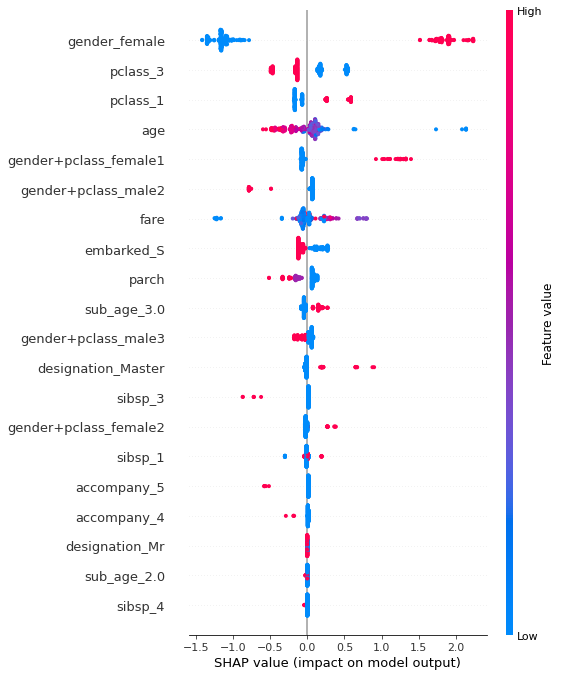

In [1239]:
shap.summary_plot(shap_values, enc_te)

# Submission
- Gradiant Boost 결과 제출

In [1240]:
submission = pd.read_csv(args.submission_csv)
print(f'{submission.shape}')
submission.head()

(393, 2)


,passengerid,survived
0,916,0.5
1,917,0.5
2,918,0.5
3,919,0.5
4,920,0.5


In [1241]:
test_pred = model.predict_proba(enc_ori_te)[:, 1]
test_pred.shape

(393,)

In [1242]:
submission['survived'] = test_pred
submission.head()

,passengerid,survived
0,916,0.751692
1,917,0.928008
2,918,0.807536
3,919,0.061191
4,920,0.947510


In [1243]:
submission.to_csv(args.submission_file, header=True, index=False)